# UNIVERSIDAD POLITÉCNICA SALESIANA

## Roberto Pacho

### Práctica



In [2]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np
%matplotlib inline
# Parámetros utilizados
HOSPITALES = 2
HOSPITAL_CAMA_A = 10
HOSPITAL_CAMA_B = 10
HOSPITAL_VENT_A = 4
HOSPITAL_VENT_B = 4
INFECTADOS = 20
TASA_CRECIMIENTO = 7
PERSONAL_MEDICO = 150
DIAS_INTERNADO = 10
DIAS_SIMULACION = 20
persona_recuperadas={}
persona_fallecidas={}

In [3]:
class Hospital(object):
    def __init__(self, env, num_cama, name):
            self.env = env
            self.num_cama = num_cama
            self.camas = simpy.Resource(env, num_cama)
            self.name = name
            
    def ingresar_paciente(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO-5, DIAS_INTERNADO+5))
        print("El paciente terminó de atenderse: ", paciente, " tiempo de salida: ", self.env.now, " hospital ", self.name)
              


In [4]:
def ingreso_paciente(env, hospital, paciente):
    arrive = env.now
    estado = random.randint(1,100)
    if (estado < 60):
        with hospital.camas.request() as cama:
            dias_esperando = random.randint(1,5) 
            requerimiento = yield cama | env.timeout(dias_esperando)
            wait = env.now - arrive
            if cama in requerimiento:
                print("Al paciente: ", paciente, " se le asigna una cama ", " hospital " , hospital.name)
                yield env.process(hospital.ingresar_paciente(paciente))
                estado = random.randint(1,100)
                if (estado < 8) :
                    persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1
                else:
                    persona_recuperadas[env.now] = persona_recuperadas[env.now] + 1 if env.now in persona_recuperadas else 1
            else:
                print("El paciente " , paciente, " en el hospital ", hospital.name, " espero ", wait , " dias y fallece no hay camas")
                persona_fallecidas[env.now] = persona_fallecidas[env.now] + 1 if env.now in persona_fallecidas else  1        
    else :
        print("El paciente no presenta covid : ", paciente, " hospital ", hospital.name )

In [5]:
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, HOSPITAL_CAMA_A, "A")
    hospitalB = Hospital(env, HOSPITAL_CAMA_B, "B")
    for i in range(infectados):
        asignar_hospital(env, hospitalA, hospitalB, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            asignar_hospital(env, hospitalA, hospitalB, paciente)

In [6]:
def asignar_hospital(env, hospitalA, hospitalB, paciente):
    hosp_esc = random.randint(1,2)
    if (hosp_esc == 1):
        print("Llega el paciente ", paciente, " al hospital 'A' en el tiempotiempo ", env.now)
        env.process(ingreso_paciente(env, hospitalA, paciente))
    else:
        print("Llega el paciente ", paciente, " al hospital 'B' en el tiempo ", env.now)
        env.process(ingreso_paciente(env, hospitalB, paciente))

In [7]:

print("Simulación")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)

Simulación
Llega el paciente  0  al hospital 'A' en el tiempotiempo  0
Llega el paciente  1  al hospital 'B' en el tiempo  0
Llega el paciente  2  al hospital 'B' en el tiempo  0
Llega el paciente  3  al hospital 'B' en el tiempo  0
Llega el paciente  4  al hospital 'B' en el tiempo  0
Llega el paciente  5  al hospital 'A' en el tiempotiempo  0
Llega el paciente  6  al hospital 'A' en el tiempotiempo  0
Llega el paciente  7  al hospital 'A' en el tiempotiempo  0
Llega el paciente  8  al hospital 'B' en el tiempo  0
Llega el paciente  9  al hospital 'A' en el tiempotiempo  0
Llega el paciente  10  al hospital 'A' en el tiempotiempo  0
Llega el paciente  11  al hospital 'B' en el tiempo  0
Llega el paciente  12  al hospital 'A' en el tiempotiempo  0
Llega el paciente  13  al hospital 'A' en el tiempotiempo  0
Llega el paciente  14  al hospital 'A' en el tiempotiempo  0
Llega el paciente  15  al hospital 'A' en el tiempotiempo  0
Llega el paciente  16  al hospital 'A' en el tiempotiempo  

Llega el paciente  80  al hospital 'B' en el tiempo  9
Llega el paciente  81  al hospital 'B' en el tiempo  9
Llega el paciente  82  al hospital 'A' en el tiempotiempo  9
Llega el paciente  83  al hospital 'A' en el tiempotiempo  9
El paciente no presenta covid :  79  hospital  B
El paciente no presenta covid :  80  hospital  B
El paciente  56  en el hospital  A  espero  3  dias y fallece no hay camas
El paciente  58  en el hospital  B  espero  3  dias y fallece no hay camas
El paciente  64  en el hospital  B  espero  2  dias y fallece no hay camas
El paciente  71  en el hospital  A  espero  1  dias y fallece no hay camas
Al paciente:  63  se le asigna una cama   hospital  A
El paciente terminó de atenderse:  7  tiempo de salida:  10  hospital  A
El paciente terminó de atenderse:  31  tiempo de salida:  10  hospital  A
El paciente terminó de atenderse:  36  tiempo de salida:  10  hospital  A
Llega el paciente  84  al hospital 'B' en el tiempo  10
Llega el paciente  85  al hospital 'B' 

In [8]:
print("<----------Resultados pacientes------->")

print("******Pacientes recuperados****** ")
print(persona_recuperadas)
print("*****Pacientes fallecidos********")
print(persona_fallecidas)

<----------Resultados pacientes------->
******Pacientes recuperados****** 
{5: 4, 6: 1, 7: 2, 9: 1, 10: 3, 12: 2, 13: 1, 14: 6, 16: 5, 17: 1, 19: 1}
*****Pacientes fallecidos********
{4: 1, 5: 2, 8: 1, 9: 4, 10: 5, 11: 4, 12: 2, 13: 4, 14: 2, 15: 2, 16: 3, 17: 1, 18: 1, 19: 1}


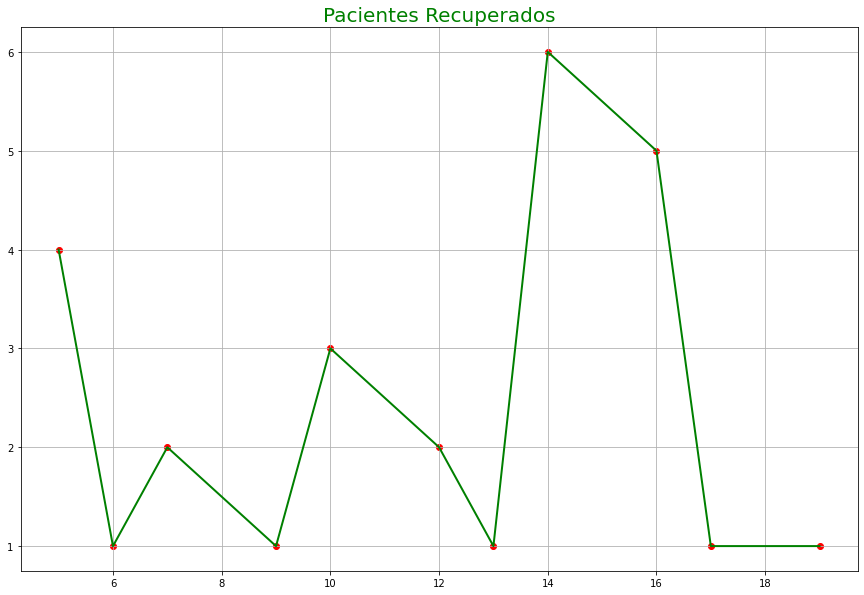

In [9]:
datos=sorted(persona_recuperadas.items()) 
x, y =zip(*datos) 
pp.figure(figsize=(15,10))
pp.plot(x,y,linewidth=2,color='green') 
pp.scatter(x,y,color='red') 
pp.title("Pacientes Recuperados",color="green",size=20)
pp.grid(True) 
pp.show()

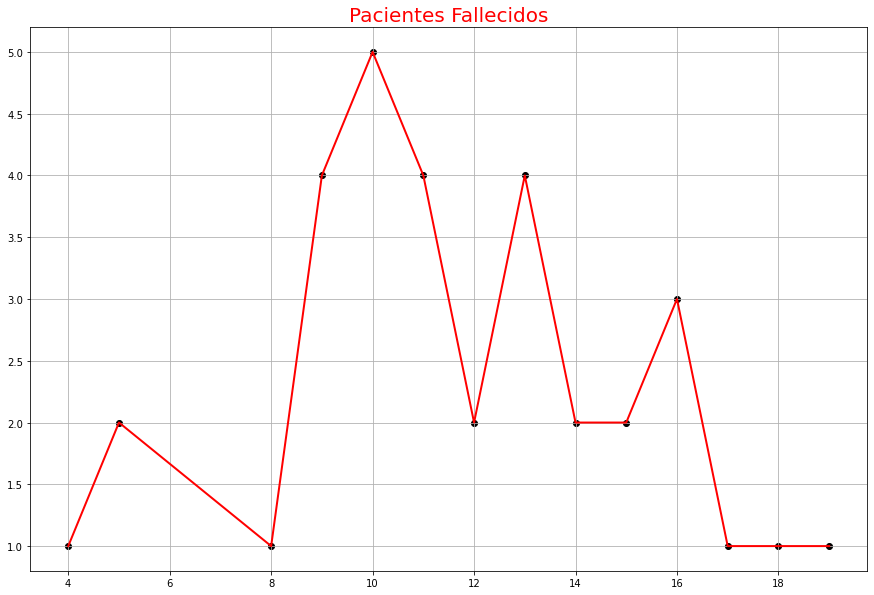

In [10]:
if (persona_fallecidas):
    datos=sorted(persona_fallecidas.items())
    pp.figure(figsize=(15,10))
    x, y =zip(*datos) 
    pp.plot(x,y,linewidth=2,color='red') 
    pp.scatter(x,y,color='black') 
    pp.title("Pacientes Fallecidos",color="red",size=20)
    pp.grid(True) 
    pp.show()
   